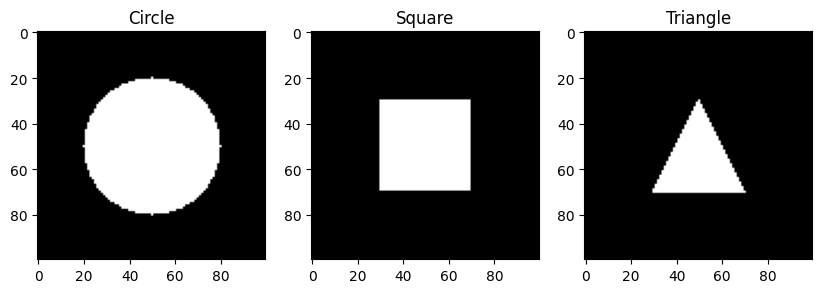

The image contains a circle.


In [1]:
# Step 1: Create binary images for circle, square, and triangle
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgSize = 100  # Image size

# Create a circle
circleImg = np.zeros((imgSize, imgSize), dtype=np.uint8)
center = (imgSize // 2, imgSize // 2)  # Center of the image
radius = 30  # Radius of the circle
cv2.circle(circleImg, center, radius, 1, thickness=-1)

# Create a square
squareImg = np.zeros((imgSize, imgSize), dtype=np.uint8)
squareImg[30:70, 30:70] = 1

# Create a triangle (equilateral triangle)
triangleImg = np.zeros((imgSize, imgSize), dtype=np.uint8)
vertices = np.array([[50, 30], [30, 70], [70, 70]], dtype=np.int32)
cv2.fillPoly(triangleImg, [vertices], 1)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(circleImg, cmap='gray')
plt.title('Circle')

plt.subplot(1, 3, 2)
plt.imshow(squareImg, cmap='gray')
plt.title('Square')

plt.subplot(1, 3, 3)
plt.imshow(triangleImg, cmap='gray')
plt.title('Triangle')

plt.show()

# Step 2: Extract features manually (Area, Perimeter, Circularity)
def calculate_area(img):
    return np.sum(img)

def calculate_perimeter(img):
    return np.sum(cv2.Canny(img, 100, 200) > 0)

def calculate_circularity(area, perimeter):
    return (4 * np.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

# Extract features for each image
circleArea = calculate_area(circleImg)
circlePerimeter = calculate_perimeter(circleImg)
circleCircularity = calculate_circularity(circleArea, circlePerimeter)

squareArea = calculate_area(squareImg)
squarePerimeter = calculate_perimeter(squareImg)
squareCircularity = calculate_circularity(squareArea, squarePerimeter)

triangleArea = calculate_area(triangleImg)
trianglePerimeter = calculate_perimeter(triangleImg)
triangleCircularity = calculate_circularity(triangleArea, trianglePerimeter)

# Combine features into a training dataset
trainingData = np.array([
    [circleArea, circlePerimeter, circleCircularity],
    [squareArea, squarePerimeter, squareCircularity],
    [triangleArea, trianglePerimeter, triangleCircularity]
])
trainingLabels = np.array([1, 2, 3])  # 1 = Circle, 2 = Square, 3 = Triangle

# Step 3: Train a k-NN classifier
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainingData, trainingLabels)

# Step 4: Test the classifier with a new image
# Create a test image (e.g., a triangle)
testImg = circleImg  # Change this to circleImg or squareImg for testing

# Extract features from the test image
testArea = calculate_area(testImg)
testPerimeter = calculate_perimeter(testImg)
testCircularity = calculate_circularity(testArea, testPerimeter)
testFeatures = np.array([[testArea, testPerimeter, testCircularity]])

# Predict the shape
predictedLabel = knn.predict(testFeatures)

# Display the result
if predictedLabel == 1:
    print('The image contains a circle.')
elif predictedLabel == 2:
    print('The image contains a square.')
elif predictedLabel == 3:
    print('The image contains a triangle.')
else:
    print('Unknown shape.')